# **Homework 9**

Due: **December 3, 5pm** (late submission until December 6, 5pm -- no submission possible afterwards)

K Means Coding Assignment: 15 points

K Means Project Report: 10 points

PCA Coding Assignment: 15 points

PCA Project Report: 10 points

### Name: Rohitha Ravindra Myla 

### Link to the github repo: https://github.com/rohitharavindra08/DATA2060

#### Run the evironment test below, make sure you get all green check, if not, you will lose 2 points for each red flag.

This is the original DATA2060 conda environment, not the one you used in the previous home work!

In [39]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'matplotlib': "3.9.1", 'numpy': "2.0.1",'sklearn': "1.5.1", 
                'pandas': "2.2.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.7

[ OK ] matplotlib version 3.9.1 is installed.
[ OK ] numpy version 2.0.1 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.


## Part 1: K-means Clustering (15 points)

#### Introduction

In this assignment, you will implement an iterative method for
clustering: k-means. Your implementation will be used for a k-means
classifier, which will be trained and tested on handwritten digits
dataset to classify an exact digit (0 to 9).

#### Stencil Code & Data

You have been provided with the following stencil files:

-   `Models`: contains the K-means classifier class that you will
    need to fill in.

-   `Check Model`: contains a series of tests to ensure you are coding your 
    model properly.

-   `Main`: contains a main function to read data, run classifier and
    print/visualize results.

-   `kmeans`: contains helper functions for K-means clustering via
    iterative improvement that you will need to fill in.

#### 8x8 Hand-written digits

In the `digits.csv` file, each row is an observation of a 8 x 8
hand-written digit (0 - 9), containing a label in the first column and 8
x 8 = 64 features (pixel values) in the rest of columns. We will ignore
the label in this exercise.

#### Data Format

We have written all the preprocessing code for you. The dataset is
represented by a `namedtuple` with one field:

-   `data.inputs` is a $m \times p$ NumPy array that contains the binary
    features of the $m$ examples, where $p$ is the number of pixels in
    each example (64).

You can find more infomation on `namedtuple`
[**here**](https://docs.python.org/3/library/collections.html#collections.namedtuple).

### **K-means Clustering**

K-means is a clustering algorithm most often used for unsupervised
machine learning. In unsupervised learning, the learner is given a
dataset with no labels and attempts to learn some useful representation
of the dataset. 

-   You will run K-means clustering on the unlabeled training data and
    plot the pixel representations of different cluster centers
    (centroids): $M = \{\mu_1 \dots \mu_{10}\}$, for clusters
    $C=\{C_{1} \dots C_{10}\}$. With K = 10, these cluster centers
    should vaguely resemble the 10 digits (0-9).

-   To predict the cluster ID, $C_{i,m+1}$ of a new datapoint ${\bf x}_{m+1}$,
    find the cluster center nearest to ${\bf x}_{m+1}$, $\mu_i$.

*Note:* You don't need to worry about changing your centroid assignments
in between runs, as we've set the random seed in the stencil.

### Functions

1.  `Models`\
    In this file, you will implement two functions. They are:

    -   `KmeansClassifier`

        -   **train()**: Learn K=10 cluster centroids (representatives)
            from the data that are robust (because they are estimated
            using a lot of data). Store cluster centroids as a Numpy
            array in *model attribute*

        -   **predict()**: predict cluster ID of inputs using the
            closest centroid's assignment

2.  `kmeans`:\
    In this file, you will implement four functions:

    -   **init_centroids()**: pick **K** random data points as cluster
        centers called centroids.

    -   **assign_step()**: assign each data instance to its nearest
        cluster centroid using Euclidean distance measure.

    -   **update_step()**: find the new cluster centroids by taking the
        average of its assigned data points.

    -   **kmeans()**: run the $K$-means algorithm: initialize centroids,
        then repeat the assignment step and update step until the
        proportion the centroids \[defined below\] change between two
        iterations is below a tolerance threshold or the maximum
        iteration time is met. The tolerance threshold is passed into
        `kmeans()` as `tol` and tolerance is compared against the ratio
        of the norm of the difference between centroids and the norm of
        the original centroids.

    *Note:* You might also want to create a separate function that
    calculates the Euclidean distance between two data points in the
    `kmeans` file. Please feel free to do so.

3.  `main`:\
    You will not need to implement any functions in this file. However,
    you will need to do two things:

    -   Uncomment the call to `plot_Kmeans` in main. This function will
        allow you to see the centroids that your k-means model learns.

### **Kmeans**

In [40]:
import numpy as np
import random

def init_centroids(k, inputs):
    """
    Selects k random rows from inputs and returns them as the chosen centroids
    Hint: use random.sample (it is already imported for you!)
    :param k: number of cluster centroids
    :param inputs: a 2D Numpy array, each row of which is one input
    :rand: random seed to be used when sampling from inputs
    :return: a Numpy array of k cluster centroids, one per row
    """
    row_indeices = random.sample(range(inputs.shape[0]), k)
    return inputs[row_indeices]


def assign_step(inputs, centroids):
    """
    Determines a centroid index for every row of the inputs using Euclidean Distance
    :param inputs: inputs of data, a 2D Numpy array
    :param centroids: a Numpy array of k current centroids
    :return: a Numpy array of centroid indices, one for each row of the inputs
    """
    # TODO

    distances = np.linalg.norm(inputs[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_step(inputs, indices, k):
    """
    Computes the centroid for each cluster
    :param inputs: inputs of data, a 2D Numpy array
    :param indices: a Numpy array of centroid indices, one for each row of the inputs
    :param k: number of cluster centroids, an int
    :return: a Numpy array of k cluster centroids, one per row
    """
    # TODO

    new_centroids = np.zeros((k, inputs.shape[1]))
    for i in range(k):
        cluster_points = inputs[indices == i]
        new_centroids[i] = cluster_points.mean(axis=0) if len(cluster_points) > 0 else np.zeros(inputs.shape[1])
    return new_centroids

def kmeans(inputs, k, max_iter, tol):
    """
    Runs the K-means algorithm on n rows of inputs using k clusters via iterative improvement
    :param inputs: inputs of data, a 2D Numpy array
    :param k: number of cluster centroids, an int
    :param max_iter: the maximum number of times the algorithm can iterate trying to optimize the centroid values, an int
    :param tol: the tolerance we determine convergence with when compared to the ratio as stated on handout
    :param rand: a given random seed to be used within init_centroids
    :return: a Numpy array of k cluster centroids, one per row
    """
    # TODO

    centroids = init_centroids(k, inputs)
    for _ in range(max_iter):
        indices = assign_step(inputs, centroids)
        new_centroids = update_step(inputs, indices, k)
        if np.linalg.norm(new_centroids - centroids) / np.linalg.norm(centroids) < tol:
            break
        centroids = new_centroids
    return centroids

### **Models**

In [41]:
class KmeansClassifier(object):
    """
    K-Means Classifier via Iterative Improvement
    @attrs:
        k: The number of clusters to form as well as the number of centroids to
           generate (default = 10), an int
        tol: Value specifying our convergence criterion. If the ratio of the
             distance each centroid moves to the previous position of the centroid
             is less than this value, then we declare convergence.
        max_iter: the maximum number of times the algorithm can iterate trying
                  to optimize the centroid values, an int,
                  the default value is set to 500 iterations
        cluster_centers_: a Numpy array where each element is one of the k cluster centers
    """

    def __init__(self, n_clusters = 10, max_iter = 500, threshold = 1e-6):
        """
        Initiate K-Means with some parameters
        """
        self.k = n_clusters
        self.tol = threshold
        self.max_iter = max_iter
        self.cluster_centers_ = np.array([])

    def train(self, X):
        """
        Compute K-Means on each cluster and store your result in self.cluster_centers_
        :param X: inputs of training data, a 2D Numpy array
        :param rand: random seed to be used during training
        :return: None
        """
        # TODO (hint: use kmeans())
        
        self.cluster_centers_ = kmeans(X, self.k, self.max_iter, self.tol)
 
    def predict(self, X):
        """
        Predicts the cluster ID of each sample in X.
        :param X: A dataset as a 2D Numpy array
        :return: A Numpy array of predicted cluster IDs
        """

        # TODO: complete this step only after having plotted the centroids!

        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

### **Check Models**

In [42]:
import pytest
from collections import namedtuple
np.random.seed(0)
random.seed(0)

# Creates Test Model with 3 clusters
test_model1 = KmeansClassifier(3)
# Creates Test Model with 2 clusters
test_model2 = KmeansClassifier(2)

# Creates Test Data
x = np.array([[0,1,7], [1,1,9], [5,0,1], [4,1,1], [0,5,0], [1,9,0]])
x2 = np.array([[3,1,7], [5,1,9], [2,8,1], [0,1,1], [0,5,0], [2,0,8]])

# Test Train Model and Checks Cluster Centers
test_model1.train(x)
test_model2.train(x2)
test_model1_sorted_clusters = test_model1.cluster_centers_[test_model1.cluster_centers_[:, 0].argsort()]
test_model2_sorted_clusters = test_model2.cluster_centers_[test_model2.cluster_centers_[:, 0].argsort()]
assert (test_model1_sorted_clusters == np.array([[.5, 7, 0], [.5, 1, 8], [4.5, .5, 1]])).all()
assert (test_model2_sorted_clusters == np.array([[1.25, 1.75, 4], [3.5, 4.5, 5]])).all()

# Tests Model Predict
assert (np.sort(test_model1.predict(x)) == [0, 0, 1, 1, 2, 2]).all()
assert (np.sort(test_model2.predict(x2)) == [0, 0, 1, 1, 1, 1]).all()

# TODO: student should print their names and date
print('Rohitha Ravindra Myla ; Nov 22,2024 ')

Rohitha Ravindra Myla ; Nov 22,2024 


### **Main**

Shape of training data inputs:  (1203, 64)
Shape of test data inputs: (594, 64)


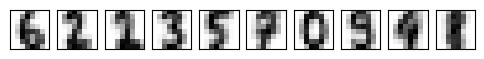

<Figure size 640x480 with 0 Axes>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

## KMEANS HELPERS ##
def plot_Kmeans(model):
    """
        Takes in a pre-trained K-Means classifier model and plots the 10 centroids.
        Note: this function is designed only for the digits.csv data set.
    :param model: pre-trained K-Means classifier model object
    :return: None
    """
    if isinstance(model, KmeansClassifier) == False:
        print("Invalid input! Model must be a KmeansClassifier object.")
        return

    cluster_centers = model.cluster_centers_
    fig, ax = plt.subplots(1, len(cluster_centers), figsize=(6, 2))

    for i in range(len(cluster_centers)):
        axi = ax[i]
        center = cluster_centers[i]
        center = np.array(center).reshape(8,8)
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    plt.show()



def runKMeans():
    '''
        Trains, plots, and tests K-Means classifier on digits.csv dataset.
    '''
    NUM_CLUSTERS = 10 # Change only for Question 3 of the Project Report
    random.seed(1) # DO NOT CHANGE
    np.random.seed(1) # DO NOT CHANGE


    # Read data
    data = pd.read_csv("/Users/rohitharavindramyla/Desktop/DATA 2060/HW/digits.csv", header = None)

    # Features columns are indexed from 1 to the end, make sure that dtype = float32
    inputs = data.values[:, 1:].astype("float32")

    # Split data into training set and test set with a ratio of 2:1
    train_inputs, test_inputs = train_test_split(inputs, test_size = 0.33)

    train_data = train_inputs
    test_data = test_inputs
    print("Shape of training data inputs: ", train_data.shape)
    print("Shape of test data inputs:", test_data.shape)

    # Train K-Means Classifier
    kmeans_model = KmeansClassifier(NUM_CLUSTERS)
    kmeans_model.train(train_data)

    # DO NOT MODIFY ABOVE THIS LINE!

    plot_Kmeans(kmeans_model)
    plt.savefig('kmeans_output.png')


# DO NOT MODIFY BELOW
runKMeans()

### **Project Report** (10 points)

#### **Question 1**
**Display your output of `plot_Kmeans()`. Does your plot match your expectations?**

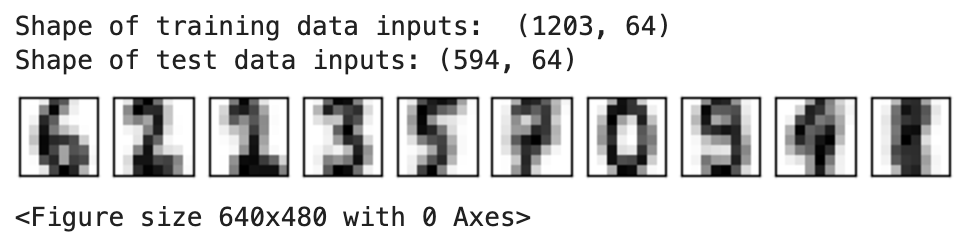

While most of the cluster centers resemble their corresponding digits (example 0 and 1 are quite distinct), some digits like 4 appear noisy and unclear. This behavior is somewhat expected with K-means clustering, as the algorithm tries to minimize the distances within clusters but does not specifically optimize for visual clarity.

In general, the output is aligned with what I anticipated, as K-means works well to group similar data points. However, the noisiness in certain digits could be improved by making some adjustments, like increasing the number of iterations, initializing centroids differently, or preprocessing the data and also dimentionality reduction. Overall, the results are satisfactory and show that the clustering process has succeeded.

#### **Question 2**
**In this assignment, you implemented k-means through a Euclidean
distance metric. Describe other distance metrics that can be used
and how they cluster inputs.**

K-means typically uses Euclidean distance, but there are other distance metrics that can be applied depending on the dataset and the specific clustering :

**Manhattan Distance:**
This measures the sum of absolute differences between the coordinates. It works well for high-dimensional data or when diagonal movements between points are not as meaningful. With Manhattan distance, clusters tend to form more rectangular shapes.

**Cosine Similarity:**
Instead of measuring distance, cosine similarity evaluates the angle between two vectors. It’s particularly useful for text data or high-dimensional datasets where the direction of features matters more than their magnitude. Clusters are formed based on how closely the points are aligned directionally.

**Minkowski Distance:**
This is a generalization of both Euclidean and Manhattan distances. By tuning the parameter p, we can adjust the behavior when p = 1 it becomes Manhattan distance, and when p=2, it becomes Euclidean distance. 

**Mahalanobis Distance:**
This metric considers correlations between features by incorporating the covariance matrix. It adjusts for scale differences and is ideal when features are correlated. 

**Hamming Distance:**
Hamming distance counts the number of differing positions between two vectors and is best suited for binary or categorical data. Clusters are formed based on exact matches in feature values, making it useful for cases like DNA sequences or one-hot encoded data.

So,
Each distance metric has its own advantages depending on the data type and problem. While Euclidean works well for numerical data, other metrics like cosine similarity or Hamming distance are better suited for text or categorical data. 

#### **Question 3**
**In `runKMeans()` in the Main section, change the number of clusters (`NUM_CLUSTERS`) to 6, and display the digits with `plot_Kmeans(kmeans_model)`. Do this as well for 15 clusters. Describe what the clutsers' centers (centroids) look like and why this is happening.**

When the number of clusters is set to 6, the cluster centers appear to be averaged representations of multiple digits. For example, the cluster that resembles 0 seems to include characteristics of other circular digits like 6 or 8, and some clusters show shapes that look like blends of 2, 5, or 3. This occurs because reducing the number of clusters forces K-means to merge visually similar digits into a single cluster, leading to centroids that lack clarity or distinctiveness. The algorithm is constrained by the fewer clusters, which results in less precise representations of individual digits.

The output is below:

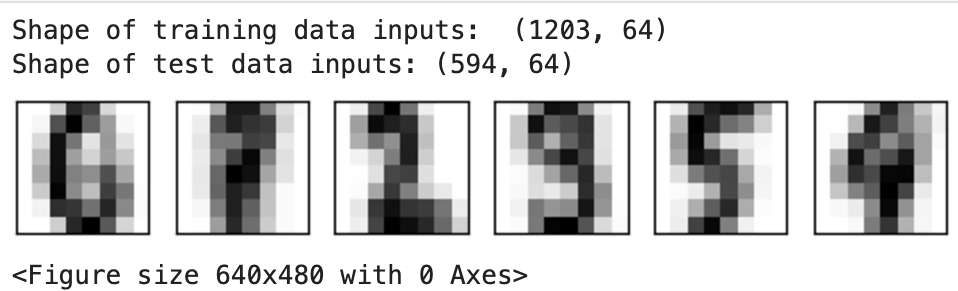

When the number of clusters is increased to 15, the cluster centers become more specific and detailed. In this case, the extra clusters allow the algorithm to capture variations in how the digits are written, such as different handwriting styles or subtle differences in strokes. For example, some digits like 1 and 7 may have multiple clusters representing different orientations or shapes, while digits like 6 and 9 appear more distinct compared to the 6-cluster case

The output is below:

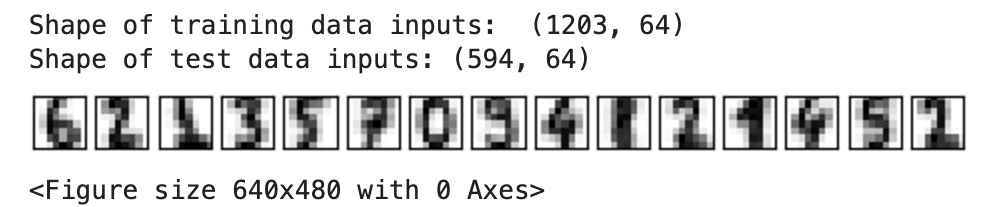

In conclusion, when the number of clusters is reduced, the cluster centers are less distinct and often represent merged characteristics of multiple digits. Increasing the number of clusters provides finer details and captures variations in handwriting, but it may also introduce redundancy. This behavior reflects the balance between generalization and specificity in clustering.

## Part 2: Principal Component Analysis

### **Mathematical Framework**

Principal Component Analysis is a popular dimensionality reduction method that is used to analyze, interpret and visualize high dimensional data. Its simplicity and non-parametric nature make it applicable in varied settings - biology, computer graphics and atmospheric science, to name a few.

At a high level the goal of PCA is to identify the most meaningful basis to re-express a dataset. The hope is that this new basis will filter out the noise and reveal a hidden structure. The mathematical setup is as follows:

Let $\mathbf{x}_1, \mathbf{x}_2, \cdots \mathbf{x}_m$ be vectors $\in \mathbb{R}^{d}$; our goal is to find a suitable linear transformation that reduces the dimensionality to $\mathbb{R}^{n}$, where $n<d$. So the first key idea is **linearity**- that is, is there another basis, which is within the span of the original basis, that best re-expresses our data set?

But what do we mean by re-express? And how do we know what's the best way to re-express our dataset? The answer here depends on what we want to accomplish from dimensionality reduction. Very briefly though, we'd like for PCA to identify dimensions that reduce noise. Noise here is not an absolute scale but relative to the signal strength. A common measure is the *signal-to-noise ratio* (SNR), or a ratio of variances: $SNR = \dfrac{\sigma_{signal}^{2}}{\sigma_{noise}^{2}}$

![Signal vs. Noise](PCA-signal-graph.png)

Another good to have, when we're re-expressing data, is reduced redundancy. Highly correlated (high covariance) features don't add much value when the goal is to reduce dimensionality. Note that the correlation may be positive or negative; we only care about the absolute value here.

This brings us to the second key idea **variance and covariance**. Features which demonstrate high variance are interesting, and will likely help uncover a useful structure. And feature pairs with high covariance imply high redundancy. The mathematical formulation is as follows:

Let $\mathbf{X} \in \mathbb{R}^{m \times d}$ represent the original dataset ($m$ is the number of training points and $d$ is the number of features) such that each feature has a **mean of zero** ($\mu_{i} = 0$ $\forall i \in \{1, 2, ... d\}$) then the covariance matrix is:
$$\mathbf{C_{X}} = \frac{1}{m}\mathbf{X}^{T}\mathbf{X}$$

Note that $\mathbf{C_{X}}$ is a square symmetric matrix of size $d \times d$, where the diagonal elements are features variances and off-diagonal values are covariances. Also, in practice since we're estimating sample variance the $\frac{1}{m}$ is actually $\frac{1}{(m-1)}$; but the idea remains the same. Circling back to the idea that high variance and low covariance is favorable, we can say that our covariance matrix is optimal if (let us assume $\mathbf{Y}$ is the transformed data $\mathbf{C_{Y}}$ is the optimal covariance matrix):
1. All of the diagonal terms of the covariance matrix ($\mathbf{C_Y}$) are zero.
2. Each successive dimension in the transformed data ($\mathbf{Y}$) should be rank ordered according to variance.

Turns out that the solution to PCA is based on the eigenvector decomposition of the covariance matrix of the original data, $\mathbf{C_X}$.

Let's tie all of this together. So our dataset $\mathbf{X} \in \mathbb{R}^{m \times d}$ is in a high-dimensional feature space; we hope to find a linear transformation $\mathbf{W} \in \mathbb{R}^{d \times n}$ ($n < d$) such that $\mathbf{Y} = \mathbf{X}\mathbf{W} \in \mathbb{R}^{m \times n}$, and $\mathbf{C_Y} = \frac{1}{m}\mathbf{Y}^T\mathbf{Y}$ is a diagonal matrix, then the columns of $\mathbf{W}$ are the principal components. Then setting the columns of $\mathbf{W}$ as the eigenvectors of $\mathbf{C}_{X}$ is the solution to our problem.

**Proof**


$\begin{align}
\mathbf{C_Y} &= \frac{1}{m}\mathbf{Y}^T\mathbf{Y} \\ 
&= \frac{1}{m}(\mathbf{XW})^T(\mathbf{XW}) \\
&= \frac{1}{m}\mathbf{W}^T\mathbf{C_X}\mathbf{W}
\end{align}$

Since $\mathbf{C_X}$ is a symmetric matrix we can decompose it using the Eigendecomposition:

$\begin{align}
\mathbf{C_X} &= \mathbf{EDE}^T \\ 
\end{align}$

Now, here lies the trick. We can pick $\mathbf{W}$ such that, $\mathbf{W} = \mathbf{E}$. Note that $\mathbf{E}$ is guaranteed to be orthonormal, i.e. $\mathbf{E}^T\mathbf{E} = \mathbf{I}$.

$\begin{align}
\implies \mathbf{C_Y} &= \mathbf{W}^T\mathbf{EDE}^T\mathbf{W} \\ 
&= \mathbf{E}^T\mathbf{EDE}^T\mathbf{E} \\
&= \mathbf{D}
\end{align}$

Therefore, setting the columns of $\mathbf{W}$ as the eigenvectors of $\mathbf{C}_{X}$ is the solution.

### **Coding PCA** (15 points)

Complete the following functions:

1. **`fit`** - primary method that takes input data `X_init` and calculates the feature means, components and variance share of each component. Make sure to use the `np.linalg.eigh` for the eigendecomposition; other methods may give inconsistent results for the test cases. In the discussion above we assumed that the mean of each feature is zero-- **center the data before finding the components.** The variance share of a component is the ratio of its eigenvalue and the sum of all eigenvalues.


2. **`transform`** - transform data `X` basis the components learnt from `X_init`. Make sure to center `X` based on the feature means calculated in `fit`.


3. **`inverse`** - inverse of the transform. If $\mathbf{Y} = \mathbf{X}\mathbf{W}$ is the transformed data then $\mathbf{\tilde{X}} = \mathbf{Y}\mathbf{W}^T$ is the inverse transform. Here $\mathbf{W}^T$ can be thought of as the recovery matrix which converts the data back to the original feature space. Remember we center the data in `fit`; what would be the inverse of centering?


4. **`mean_squared_error`** - If $\mathbf{Y}$ is the transformed data and $\mathbf{\tilde{X}}$ is the inverse of $\mathbf{Y}$, the squared mean squared error $\frac{1}{m}\sum_{i=1}^{m}\lvert\lvert\mathbf{\tilde{x}}_{i}-\mathbf{x}_{i}\rvert\rvert_{2}^{2}$ where $\mathbf{\tilde{x}}_{i}$ and $\mathbf{x}_{i}$ are the rows of $\mathbf{\tilde{X}}$ and $\mathbf{X}$ respectively.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PCA:

    def __init__(self):
        """Initialize PCA."""
        
        # Assign appropriate values to these instance variables in the fit method.
        
        self.ftr_means = None
        self.cov_mat = None
        self.components = None
        self.variance_share = None
        
    def fit(self, X_init:np.ndarray) -> None:
        """Fit the model with X_init.
        
        Parameters
        ----------
          X_init: np.ndarray of shape (m x d); m = number of samples and d = number of features."""
        
        # TODO: find feature means
        
        # TODO: center the data
        
        # TODO: find covariance matrix and perform eigendecomposition using np.linalg.eigh
        
        # TODO: sort components in descending order of eigenvalues. 
        # Calculate variance share of each component and store in a numpy array.

        self.ftr_means = np.mean(X_init, axis=0)
    
        centered_data = X_init - self.ftr_means

        self.cov_mat = (centered_data.T @ centered_data) / (centered_data.shape[0] - 1)

        eigvals, eigvecs = np.linalg.eigh(self.cov_mat)

        sorted_indices = np.argsort(eigvals)[::-1]
        eigvals = eigvals[sorted_indices]
        eigvecs = eigvecs[:, sorted_indices]
        
        self.components = eigvecs
        self.variance_share = eigvals / np.sum(eigvals)

    def transform(self, X:np.ndarray, n_components:int) -> np.ndarray:
        """Apply dimensionality reduction to X (m x d).
        Return transformed values with dimension n<d.
        
        Parameters
        ----------
          X: np.ndarray of shape (m x d); m = number of samples and d = number of features.
          n_components: Number of principal components, i.e. reduced dimension."""
        
        assert n_components<=X.shape[1], "Number of components cannot be greater than input dimension."
        
        # TODO: center X and transform as per number of components
        
        centered_X = X - self.ftr_means
        return np.dot(centered_X, self.components[:, :n_components])

    def inverse(self, X_dash:np.ndarray) -> np.ndarray:
        """Find the inverse transform of X_dash.
        
        Parameters
        ----------
          X_dash: np.ndarray of shape (m x n); m = number of samples and n = number of features in the reduced space."""
        
        # TODO

        original_space = np.dot(X_dash, self.components[:, :X_dash.shape[1]].T)
        return original_space + self.ftr_means

    
    def mean_squared_error(self, X:np.ndarray, n_components:int) -> float:
        """Apply dimensionality reduction to X (m x d). 
        Return error after taking the inverse of the transform.
        
        Parameters
        ----------
          X: np.ndarray of shape (m x d); m = number of samples and d = number of features.
          n_components: int Number of principal components, i.e. reduced dimension."""
        
        assert n_components<=X.shape[1], "Number of components cannot be greater than input dimension."
        
        # TODO

        reduced = self.transform(X, n_components)
        reconstructed = self.inverse(reduced)
  
        mse = np.mean(np.sum((X - reconstructed) ** 2, axis=1))
        #print("Reduced Data:\n", reduced)
        #print("Reconstructed Data:\n", reconstructed)
        #print("MSE:\n", mse)
        return mse

### **Check Model**

In [45]:
# DO NOT EDIT

from pytest import approx

model1 = PCA()
model2 = PCA()

X1_init = np.array([[7, 4, 2],[4, 5, 1],[5, 4, 1],[8, 4, 2],[7, 5, 0]])

X2_init = np.array([[24,  5,  5,  0],[20,  6,  5,  0],[ 4,  4,  8,  0],[14,  6,  6,  2],
                    [19,  5,  8,  0],[ 9,  5,  7,  1],[16,  3, 10,  1],[15,  5,  6,  2],[15,  6, 11,  0]])

model1.fit(X1_init)
model2.fit(X2_init)

############# CHECK FIT ################

def check_fit_dtypes(model, X):
    assert isinstance(model.ftr_means, np.ndarray) and model.ftr_means.shape==(X.shape[1],), "Feature means are of the incorrect type or shape."
    assert isinstance(model.cov_mat, np.ndarray) and model.cov_mat.shape==(X.shape[1],X.shape[1]), "Covariance matrix is of the incorrect type or shape."
    assert isinstance(model.components, np.ndarray) and model.components.shape==(X.shape[1],X.shape[1]), "Components matrix is of the incorrect type or shape."
    assert isinstance(model.variance_share, np.ndarray) and model.variance_share.shape==(X.shape[1],), "Variance share array is of the incorrect type or shape."
    
def check_vals(test_values, true_values, rtol=1e-2):
    assert np.all(np.isclose(test_values,true_values,rtol=rtol))


check_fit_dtypes(model1, X1_init)
check_vals(model1.ftr_means, np.array([6.2, 4.4, 1.2])) # check feature means
check_vals(model1.cov_mat, np.array([[ 2.7, -0.35, 0.45],[-0.35, 0.3, -0.35],[0.45, -0.35, 0.7]])) # check covariance
check_vals(model1.components, np.array([[-0.9606, 0.2757, 0.0347],[0.1619, 0.4537, 0.8763],[-0.2258, -0.8474, 0.4805]]))
check_vals(model1.variance_share, np.array([0.77426, 0.20026, 0.025438]))


check_vals(model2.ftr_means, np.array([15.1111,  5.0000,  7.3333,  0.6666]))
check_vals(model2.cov_mat,np.array([[35.111,1.625,-3.9166,-0.95833],[1.625,1.,-0.75,0.],
                                    [-3.9166,-0.75,4.5,-0.375],[-0.95833333,0.,-0.375,0.75]]))

check_vals(model2.components,np.array([[-0.9906,-0.1268,-0.0359,-0.0372],[-0.0491,0.1641,0.9673,-0.1868],
                                       [0.1252,-0.968,0.138,-0.1684],[0.0258,0.1417,-0.2095,-0.9671]]))
check_vals(model2.variance_share, np.array([0.8634, 0.1008, 0.0201, 0.0157]))


############# CHECK TRANSFORM ################

def check_transform_dtypes(model, X, n_components=2):
    Y = model.transform(X, n_components)
    assert isinstance(Y, np.ndarray) and Y.shape==(X.shape[0],n_components)

X1 = np.array([[4,3,2],[2,5,0],[4,4,2]])
X2 = np.array([[18,4,3,2],[10,7,9,2],[16,4,9,1],[3,5,4,1],
               [20,6,4,1],[4,3,12,2],[15,6,8,0],[14,4,12,2]])

check_transform_dtypes(model1, X1, 2)
check_transform_dtypes(model2, X2, 2)
check_transform_dtypes(model2, X2, 3)

Y11 = model1.transform(X1, n_components=1)
Y12 = model1.transform(X1, n_components=2)

Y21 = model2.transform(X2, n_components=1)
Y22 = model2.transform(X2, n_components=2)
Y23 = model2.transform(X2, n_components=3)


check_vals(Y11,np.array([[1.706],[4.4027],[1.8679]]))
check_vals(Y12,np.array([[1.706,-1.9197],[4.4027,0.1311],[1.8679,-1.466]]))

check_vals(Y21,np.array([[-3.3206],[5.2079],[-0.6142],[11.5884],
                         [-5.3006],[11.7232],[0.1272],[1.7683]]))

check_vals(Y22,np.array([[-3.3206,3.8531],[5.2079,-0.4483],[-0.6142,-1.8428],[11.5884,4.8089],
                         [-5.3006,2.8181],[11.7232,-3.248],[0.1272,-0.5616],[1.7683,-4.3514]]))

check_vals(Y23,np.array([[-3.3206,3.8531,-1.9486],[5.2079,-0.4483,2.0691],[-0.6142,-1.8428,-0.8391],
                         [11.5884,4.8089,-0.0945],[-5.3006,2.8181,0.2617],[11.7232,-3.248,-1.1706],
                         [0.1272,-0.5616,1.203],[1.7683,-4.3514,-0.5627]]))


############# CHECK INVERSE ################

def check_inverse_dtypes(model, X, Y):
    X_inverse = model.inverse(Y)
    assert isinstance(X_inverse, np.ndarray) and X.shape==X_inverse.shape

check_inverse_dtypes(model1, X1, Y12)
check_inverse_dtypes(model2, X2, Y22)
check_inverse_dtypes(model2, X2, Y23)

X_inv11 = model1.inverse(Y11)
X_inv12 = model1.inverse(Y12)

X_inv21 = model2.inverse(Y21)
X_inv22 = model2.inverse(Y22)
X_inv23 = model2.inverse(Y23)


check_vals(X_inv11, np.array([[4.5612,4.6762,0.8147],[1.9707,5.1128,0.2056],[4.4057,4.7024,0.7781]]))
check_vals(X_inv12, np.array([[4.0319,3.8052,2.4415],[2.0068,5.1723,0.0945],[4.0015,4.0373,2.0204]]))

check_vals(X_inv21, np.array([[18.4005,5.163,6.9177,0.581],[9.9523,4.7444,7.9852,0.8011],
                              [15.7195,5.0301,7.2564,0.6508],[3.6318,4.4313,8.7839,0.9658],
                              [20.3618,5.2601,6.6698,0.5299],[3.4983,4.4246,8.8008,0.9692],
                              [14.9851,4.9938,7.3493,0.67],[13.3595,4.9132,7.5547,0.7123]]))

check_vals(X_inv22, np.array([[17.9121,5.7952,3.188,1.1269],[10.0091,4.6708,8.4192,0.7376],
                              [15.9531,4.7278,9.0402,0.3897],[3.0223,5.2203,4.1292,1.6471],
                              [20.0046,5.7225,3.942,0.9292],[3.91,3.8917,11.9447,0.509],
                              [15.0563,4.9016,7.8929,0.5904],[13.911,4.1992,11.7667,0.0958]]))

check_vals(X_inv23, np.array([[17.9821,3.9102,2.9191,1.5352],[9.9347,6.6724,8.7048,0.3041],
                              [15.9833,3.9161,8.9244,0.5655],[3.0257,5.1288,4.1161,1.6669],
                              [19.9952,5.9757,3.9781,0.8743],[3.9521,2.7594,11.7831,0.7543],
                              [15.013,6.0654,8.0589,0.3383],[13.9313,3.6549,11.689,0.2136]]))

############# CHECK MEAN SQUARE ERROR ################

err11 = model1.mean_squared_error(X1, 1)
err12 = model1.mean_squared_error(X1, 2)

err21 = model2.mean_squared_error(X2, 1)
err22 = model2.mean_squared_error(X2, 2)
err23 = model2.mean_squared_error(X2, 3)

assert err11==approx(2.2459, rel=1e-2)
assert err12==approx(0.29489, rel=1e-2)

assert err21==approx(12.5622, rel=1e-2)
assert err22==approx(2.64839, rel=1e-2)
assert err23==approx(1.14915, rel=1e-2)


# TODO: student should print their names and date
print('Rohitha Ravindra Myla ; Dec 01,2024 ')

Rohitha Ravindra Myla ; Dec 01,2024 


### **Project Report** (10 points)


In [46]:
# DO NOT EDIT
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/rohitharavindramyla/Desktop/DATA 2060/HW/digits.csv',header=None).values
X_init = data[:,1:]

#### Question 1
Apply PCA to the digits data, and plot variance share as a function of the number of components. Make sure to plot cumulative values, label the axis, and set the chart title. Find the minimum number of components that have a variance share greater than or equal to 90%.

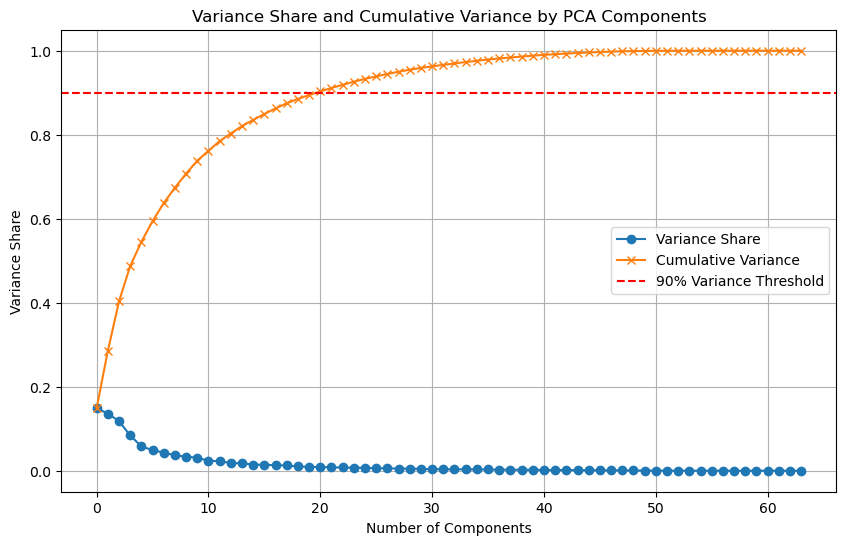

Minimum number of components to capture at least 90% variance: 21


In [47]:
# DO NOT EDIT
digits_model = PCA()
digits_model.fit(X_init)

# TODO
cumulative_variance = np.cumsum(digits_model.variance_share)

plt.figure(figsize=(10, 6))
plt.plot(digits_model.variance_share, label='Variance Share', marker='o')
plt.plot(cumulative_variance, label='Cumulative Variance', marker='x')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Variance Share')
plt.title('Variance Share and Cumulative Variance by PCA Components')
plt.legend()
plt.grid()
plt.show()

min_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Minimum number of components to capture at least 90% variance: {min_components}")

#### Question 2
Use the `digits_model` initialized above and apply PCA on digit 6 (index 67, in X_init) with 1, 2, 4, 8, 16, 32 components. Plot the original and the inverses. Explain the trend, and identify the minimum number of components that sufficiently reconstruct the original image.

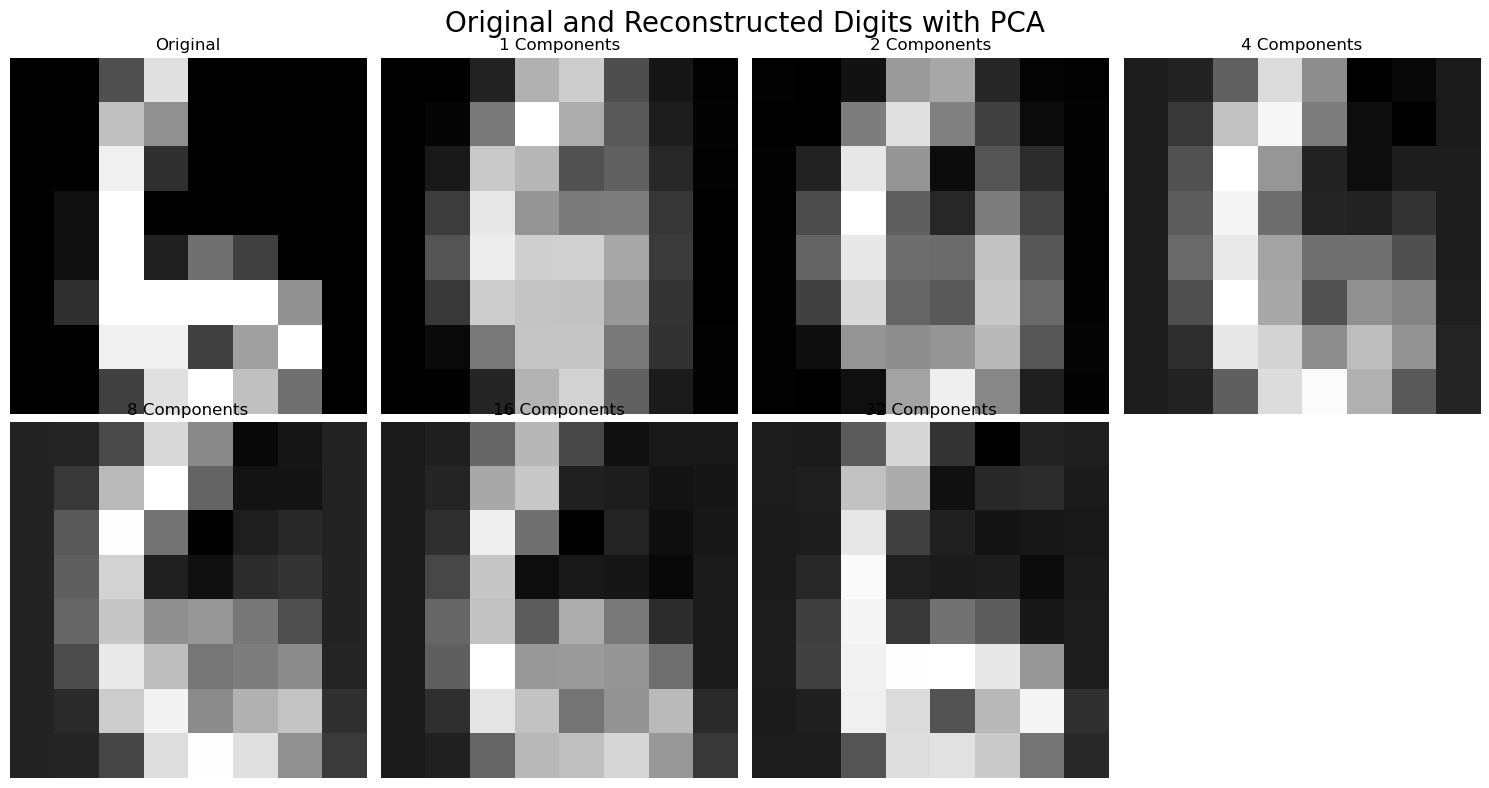

In [57]:
digit = X_init[67].reshape(1,-1)
components = [1,2,4,8,16,32]

# TODO:
digit = X_init[67].reshape(1, -1)

components = [1, 2, 4, 8, 16, 32]

plt.figure(figsize=(15, 8))

plt.subplot(2, len(components)//2 + 1, 1)
plt.imshow(digit.reshape(8, 8), cmap='gray', interpolation='nearest')
plt.title("Original")
plt.axis('off')

for i, n_components in enumerate(components, start=2):
    reduced = digits_model.transform(digit, n_components)
    reconstructed = digits_model.inverse(reduced)

    plt.subplot(2, len(components)//2 + 1, i)
    plt.imshow(reconstructed.reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.title(f"{n_components} Components")
    plt.axis('off')

plt.suptitle("Original and Reconstructed Digits with PCA", fontsize=20)
plt.tight_layout()
plt.show()


The reconstruction of the digit shows a clear trend, with 1 or 2 components, only the general shape is captured, resulting in a heavily blurred image. As the number of components increases to 4 or 8, more details emerge, with edges and structure becoming clearer. By 16 components, the reconstruction closely resembles the original image, capturing both its primary shape and finer details. Using 32 components offers only slight improvements, suggesting that 16 components are sufficient for an accurate and visually satisfactory reconstruction of the digit in this case. 

#### Question 3
**Apply PCA on the digits data, and transform with 1, 2, 4, 8, 16, 32 components. Perform K-means clustering on the transformed data, and plot the inverses of the cluster centers.**

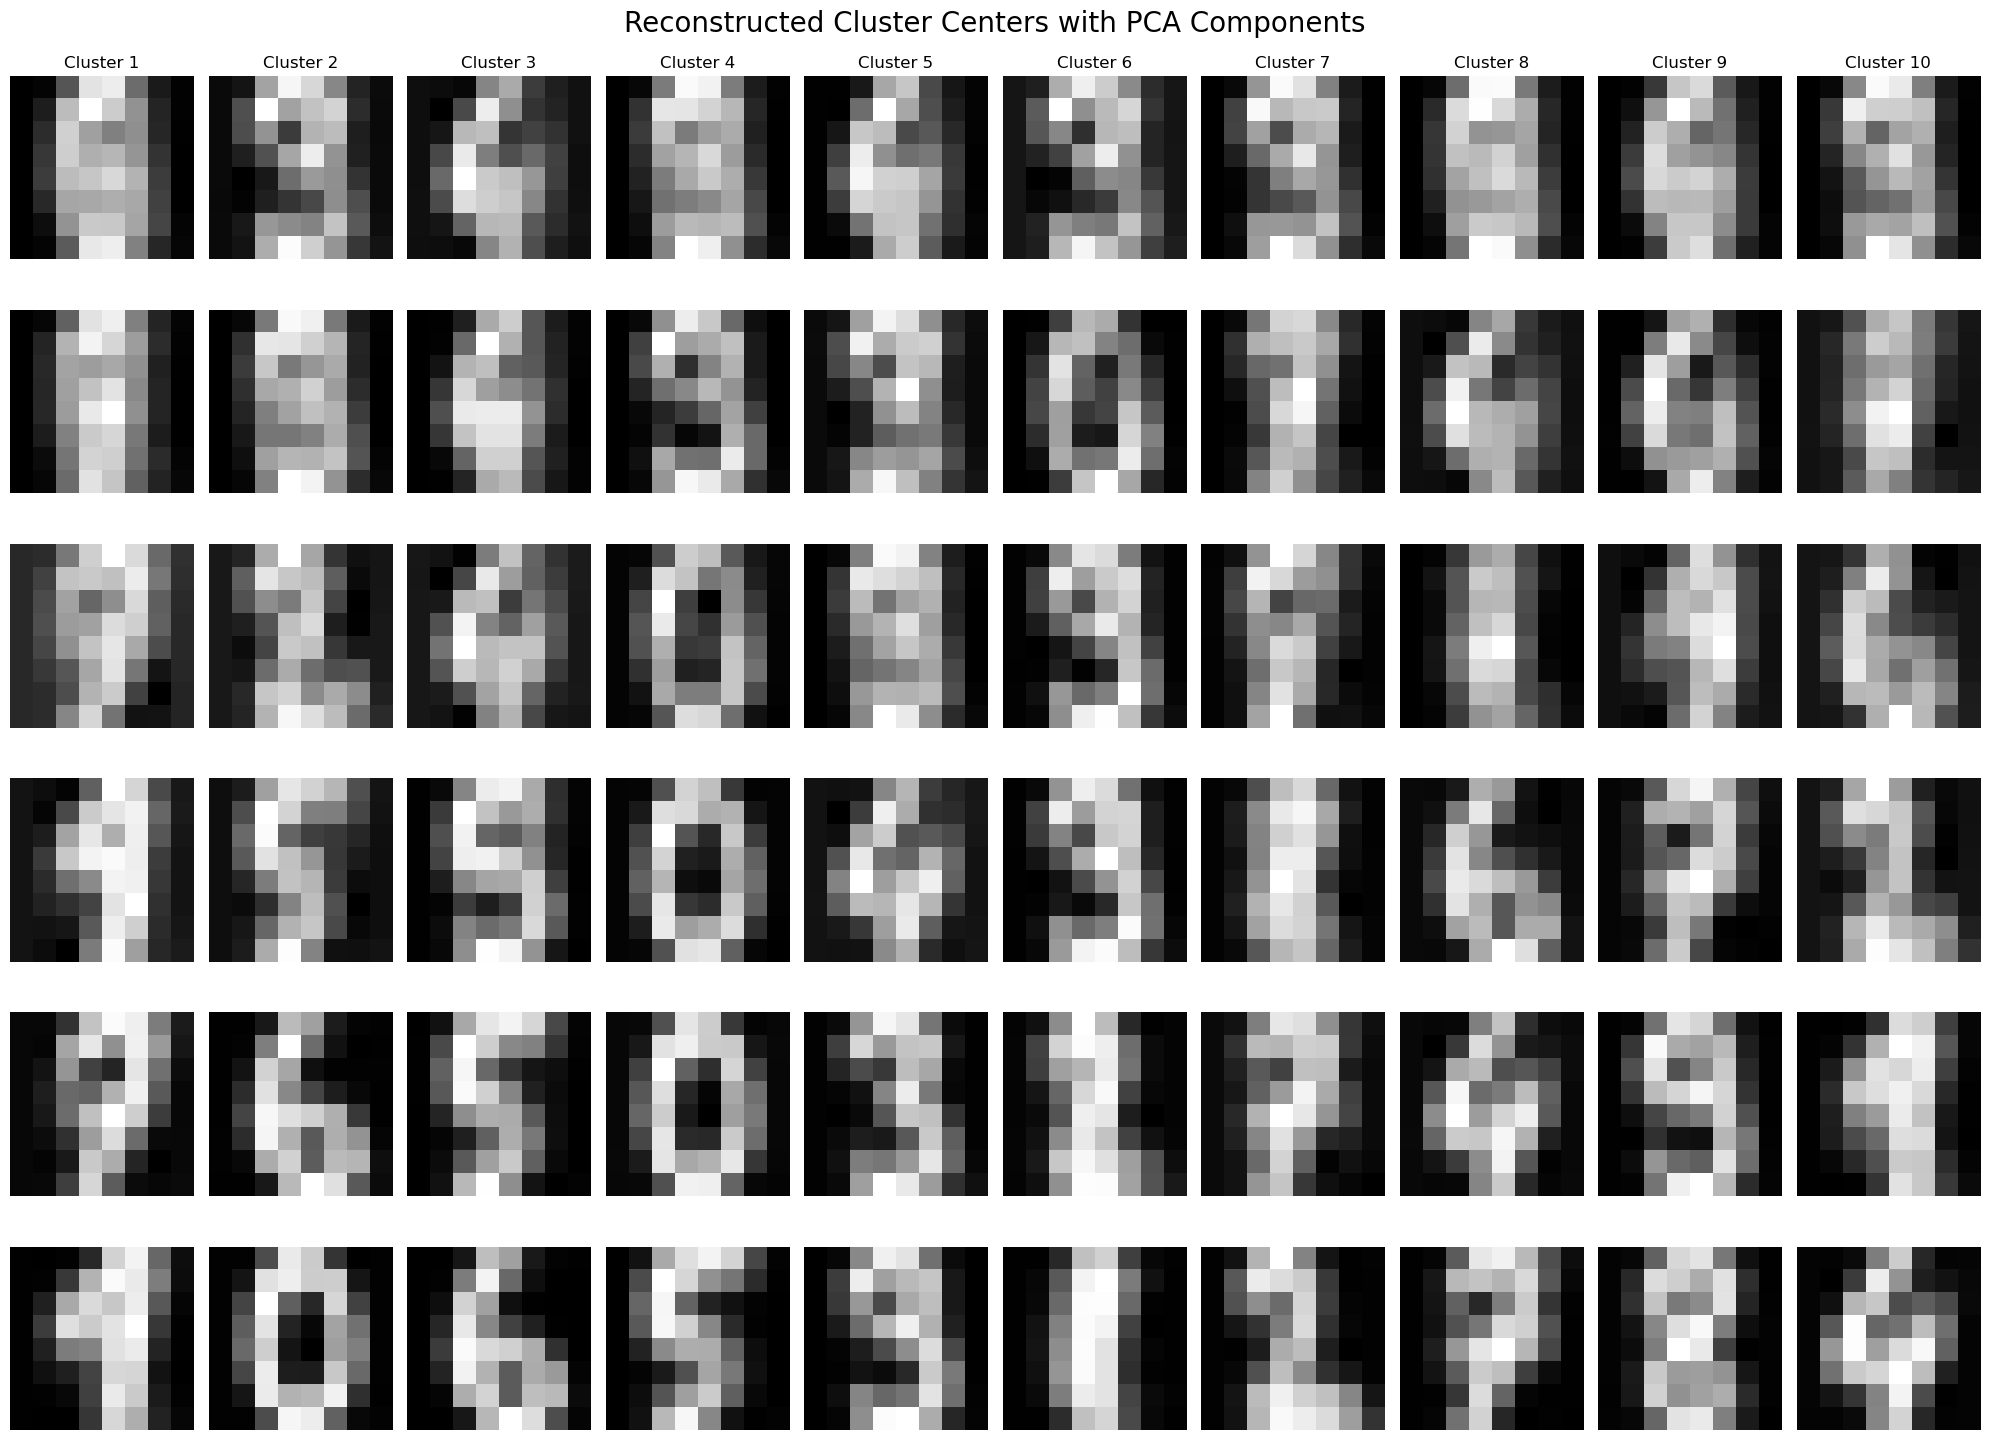

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

components = [1,2,4,8,16,32]
num_clusters = 10

# TODO:

plt.figure(figsize=(20, 15))

for idx, n_components in enumerate(components):
    transformed_data = digits_model.transform(X_init, n_components)     # Data transform with PCA
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)           # Apply K-means clustering
    kmeans.fit(transformed_data)

    cluster_centers = kmeans.cluster_centers_                           # Get cluster centers and inverse transform to reconstruct
    reconstructed_centers = digits_model.inverse(cluster_centers)
 
    for j in range(num_clusters): 
        plt.subplot(len(components), num_clusters, idx * num_clusters + j + 1)
        plt.imshow(reconstructed_centers[j].reshape(8, 8), cmap='gray', interpolation='nearest')
        plt.axis('off')
        if idx == 0:
            plt.title(f"Cluster {j+1}")
    plt.suptitle(f"Reconstructed Cluster Centers with PCA Components", fontsize=20)

plt.tight_layout()
plt.show()